# Data Exploration of in game activities for a mobile MMO 

This is a pseudo dataset with some real data and some random data points. Primarirly for my own exploration as to the sorts of questions I could ask game designers when conducting a regression analysis.

The goal of this work is to determine the relationship between various in game activities and a players minutes played (recorded on a daily basis). i.e. farming = 1 means engaged on the day. 

The data includes 500 rows of data from DSI 30+ players and their engagement with activities on a single gameplay day. 

There are many factors outside the scope of this work which would influence this number, e.g. are there live events running on a given day?, I just thought this was an interesting starting point

I've chosen a linear regression model as my dataset is reasonably small, the outcomes of the model are easy to visualise and hence simpler to communicate when driving action points and finally the data I'm using generally follows a linear pattern.


In [155]:
# importing libraries

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [114]:
# importing my dataset

activities = pd.read_csv('C:/Users/Anno/Downloads/activities_python_0824 - fake_sheet.csv')

activities.head()

,country_group,operating_system,campaign,buying,crafting,woodchopping,fishing,farming,customisation,minutes_played
0,us/gb/au/ca,ios,paid,0,0,0,1,1,1,120
1,us/gb/au/ca,ios,paid,0,0,0,0,1,1,120
2,us/gb/au/ca,ios,free,0,0,0,0,0,1,120
3,us/gb/au/ca,ios,free,0,0,0,0,0,1,120
4,us/gb/au/ca,ios,free,0,0,0,1,0,1,120


In [116]:
# I'll create a pd dataframe with manually assigned values for categories to include them in the matrix

activities_temp = activities

os_mapping = {'android': 0, 'ios': 1, 'anroid' : 0}
country_mapping = {'us/gb/au/ca' : 0, 'others' : 1}
campaign_mapping = {'free' : 0, 'paid' : 1}

activities_temp['operating_system'] = activities_temp['operating_system'].map(os_mapping)
activities_temp['country_group'] = activities_temp['country_group'].map(country_mapping)
activities_temp['campaign'] = activities_temp['campaign'].map(campaign_mapping)

activities_temp

,country_group,operating_system,campaign,buying,crafting,woodchopping,fishing,farming,customisation,minutes_played
0,0,1,1,0,0,0,1,1,1,120
1,0,1,1,0,0,0,0,1,1,120
2,0,1,0,0,0,0,0,0,1,120
3,0,1,0,0,0,0,0,0,1,120
4,0,1,0,0,0,0,1,0,1,120
...,...,...,...,...,...,...,...,...,...,...
494,0,0,0,1,0,1,0,1,0,5
495,0,0,0,1,0,1,1,0,0,5
496,1,0,0,0,0,0,0,0,0,5
497,1,0,0,1,0,1,1,0,0,5


<AxesSubplot:>

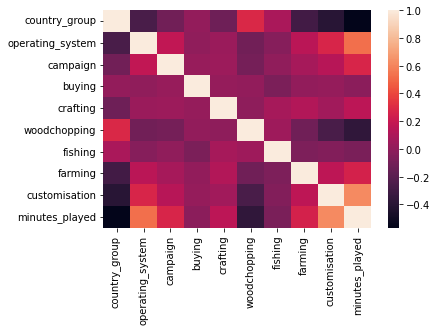

In [117]:
# correlation matrix to determine high level relationships

sns.heatmap(activities_temp.corr())

In [120]:
# observing the correlation numbers we can see some key figures with high correlations 
# customisation, farming have reasonable positive correlations, while woodchopping has an interesting negative correlation
# it's notable that woodchopping in the above graphic has a small but noticable negative correlation in the above graphic 

# country_group is a heavy predictor of many aspects of the game - in a more effective study I would perform this analysis
# on a specific country_group - I'm restricted by sample at the moment 

# for the sake of experimentation/discussion I'll assume the same country/os for future discussion in this nb 

activities_temp.corr()['minutes_played']

country_group      -0.567331
operating_system    0.527541
campaign            0.276766
buying             -0.020629
crafting            0.155223
woodchopping       -0.367328
fishing            -0.077948
farming             0.256266
customisation       0.618514
minutes_played      1.000000
Name: minutes_played, dtype: float64

In [144]:
activities_new = activities.drop(['country_group', 'operating_system', 'campaign', 
                                  'buying', 'fishing'], axis = 1)

X = activities_new.iloc[:, :-1].values
y = activities_new.iloc[:, 4].values

In [160]:
activities_new

,crafting,woodchopping,farming,customisation,minutes_played
0,0,0,1,1,120
1,0,0,1,1,120
2,0,0,0,1,120
3,0,0,0,1,120
4,0,0,0,1,120
...,...,...,...,...,...
494,0,1,1,0,5
495,0,1,0,0,5
496,0,0,0,0,5
497,0,1,0,0,5


In [145]:
# this is unecessary as the categorical values aren't being used at the moment 

# encoding categorical data
# we need numbers as opposed to categories to process the values
    
# for col in range(3):
#     le = LabelEncoder()
#     X[:, col] = le.fit_transform(X[:, col])

In [146]:
# splitting my data into testing and training data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [147]:
# fitting multiplle linear regression to the training set

regressor = LinearRegression()
regressor.fit(X_train, y_train) 

LinearRegression()

In [148]:
# predicting test results

y_pred = regressor.predict(X_test)
y_pred

array([77.39346582, 60.97009928, 68.63397299, 41.84565482, 49.50952853,
       77.32505529, 41.84565482, 34.25019165, 93.74842183, 49.50952853,
       93.74842183, 60.97009928, 41.84565482, 41.84565482, 77.32505529,
       41.91406535, 41.84565482, 58.26902136, 84.988929  , 49.50952853,
       77.32505529, 41.91406535, 93.74842183, 77.32505529, 50.60514765,
       25.49069881, 86.08454812, 34.25019165, 84.988929  , 84.988929  ,
       41.84565482, 86.08454812, 60.97009928, 86.08454812, 60.97009928,
       41.84565482, 41.91406535, 41.84565482, 58.26902136, 93.74842183,
       50.60514765, 84.988929  , 25.49069881, 84.988929  , 84.988929  ,
       86.08454812, 77.32505529, 25.49069881, 41.84565482, 93.74842183,
       49.50952853, 93.74842183, 41.84565482, 49.50952853, 77.39346582,
       50.60514765, 41.84565482, 84.988929  , 84.988929  , 77.32505529,
       77.32505529, 49.50952853, 41.84565482, 41.84565482, 34.25019165,
       84.988929  , 84.988929  , 77.32505529, 86.08454812, 93.74

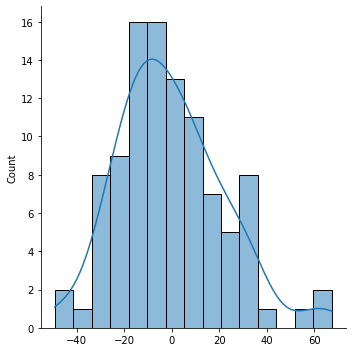

In [149]:
# clarifying that the residuals follow a normal distribution for MLR

residuals = y_test - y_pred

sns.displot(residuals, bins = 15, kde = True)

In [152]:
# calculating r squared value
# for the level of complexity within an MMO I feel that an R-Square of 0.65 is a reasonable score (0.65 achieved with os etc)
# 0.48 with limited variables included 

# with some better data I may improve this score further

r2_score(y_test, y_pred)

0.4851441355716859

In [156]:
# predictions 17 minutes off actual

mean_absolute_error(y_test, y_pred)

17.427233360597153

In [157]:
mean_squared_error(y_test, y_pred)

484.0271190357297

In [153]:
pred_y_df = pd.DataFrame({'actual_value' : y_test, 'predicted_value' : y_pred, 'difference' : y_test - y_pred})
pred_y_df[0:10]

,actual_value,predicted_value,difference
0,100,77.393466,22.606534
1,62,60.970099,1.029901
2,56,68.633973,-12.633973
3,17,41.845655,-24.845655
4,10,49.509529,-39.509529
5,117,77.325055,39.674945
6,48,41.845655,6.154345
7,6,34.250192,-28.250192
8,82,93.748422,-11.748422
9,84,49.509529,34.490471


In [158]:
# calculate coefficient  
# based on the cells we can see that e.g. 35.4 = somebody customises = more likely to have higher minutes played
regressor.coef_

array([  7.66387371, -16.35495601,   8.75949283,  35.47940047])

In [159]:
# calculate intercept

regressor.intercept_

41.845654819985235

# Conclusions

Overall, our R2 is still worth discussing dispite the low nature - as discussed previously getting a better dataset and clarifying some of the noise surrounding OS and country should let us delve into better design related questions 

Some actions which could arise from this form of exploration:

1) Customisation seems to drive minutes played better than most areas, can we drive more players toward customisation
    b (data team) ) Are players who customise tied to any other metrics (possibly social systems)

2) Woodcutting has a negative relationship with minutes played - what within the gameplay drives this? 
    b) It has a negative correlation with customisation - are the customisation and woodcutting areas too far apart in 
       game? 
    c) Is there a lack of efficiency/progression tied to woodcutting for late game players? i.e. this data is for mature          players, are the ones who find themselves chopping wood less 'efficient'/lacking direction - can this be taught? 
    
3) Crafting was introduced as a retention mechanic for high level players, should it have a bigger impact on minutes        played?
    b) The crafting system involves many automated systems for players (daily machines etc) is there a conflict between the retention KPI and minutes played KPI? 